In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1=df.drop(['location','society','availability'],axis=1)
df1

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,4 BHK,4689,4.0,1.0,488.00


In [7]:
df1.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df_float=df.drop(['location','society','availability','size','area_type','total_sqft'],axis=1)
df_float

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [9]:
df1.dtypes

area_type      object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [10]:
df_float.dtypes

bath       float64
balcony    float64
price      float64
dtype: object

In [11]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=10)
imputed_values = imputer.fit_transform(df_float)

# Create a DataFrame with the imputed values
imputed_df = pd.DataFrame(imputed_values, columns=df_float.columns)

# Print the imputed dataset
print(imputed_df)


       bath  balcony   price
0       2.0      1.0   39.07
1       5.0      3.0  120.00
2       2.0      3.0   62.00
3       3.0      1.0   95.00
4       2.0      1.0   51.00
...     ...      ...     ...
13315   4.0      0.0  231.00
13316   5.0      2.3  400.00
13317   2.0      1.0   60.00
13318   4.0      1.0  488.00
13319   1.0      1.0   17.00

[13320 rows x 3 columns]


In [12]:
imputed_df.isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [13]:
imputed_df

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,2.3,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [14]:
final_df=pd.merge(df,imputed_df)
final_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200,5.0,3.0,120.00
...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187,2.0,2.0,40.14
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220.00
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134.00
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00


In [15]:
final_df.isnull().sum()

area_type           0
availability        0
location            7
size                0
society         87776
total_sqft          0
bath                0
balcony             0
price               0
dtype: int64

In [16]:
best_df = final_df.drop_duplicates()
best_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200,5.0,3.0,120.00
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875,5.0,3.0,120.00
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187,2.0,2.0,40.14
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220.00
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134.00
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00


In [17]:
best_df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5041
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [18]:
best_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [19]:
best_df['size'].unique()

array(['2 BHK', '4 Bedroom', '5 Bedroom', '3 BHK', '3 Bedroom',
       '2 Bedroom', '1 BHK', '4 BHK', '1 RK', '1 Bedroom', '6 Bedroom',
       '8 Bedroom', '6 BHK', '7 Bedroom', '5 BHK', '7 BHK', '11 BHK',
       '9 BHK', '9 Bedroom', '8 BHK', '27 BHK', '11 Bedroom',
       '12 Bedroom', '43 Bedroom', '14 BHK', '10 Bedroom', '13 BHK'],
      dtype=object)

In [20]:
best_df['BHK']=best_df['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Gurkirat Singh\AppData\Local\Temp\ipykernel_10984\3335608473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['BHK']=best_df['size'].apply(lambda x: int(x.split(' ')[0]))


In [21]:
best_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200,5.0,3.0,120.00,5
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875,5.0,3.0,120.00,5
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3


In [22]:
best_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
BHK               int64
dtype: object

In [23]:
best_df['BHK'].unique()

array([ 2,  4,  5,  3,  1,  6,  8,  7, 11,  9, 27, 12, 43, 14, 10, 13],
      dtype=int64)

In [24]:
best_df[best_df.BHK>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
183453,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000,9.0,3.0,360.0,11
227636,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27
228485,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200,11.0,0.0,170.0,11
238327,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,NaN,1200,6.0,3.0,150.0,11
239838,Plot Area,Ready To Move,Mysore Road,12 Bedroom,NaN,2232,6.0,2.0,300.0,12
239931,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43
240194,Super built-up Area,Ready To Move,1Channasandra,14 BHK,NaN,1250,15.0,0.0,125.0,14
243625,Super built-up Area,Ready To Move,1Hoysalanagar,13 BHK,NaN,5425,13.0,0.0,275.0,13


In [25]:
best_df.total_sqft.unique()

array(['1056', '2600', '1200', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
best_df[~best_df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
128,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3.0,1.0,95.000,3
881,Built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,NaN,120Sq. Yards,2.0,1.0,51.000,2
7324,Super built-up Area,Ready To Move,Rajapura,2 BHK,NaN,86.72Sq. Meter,2.0,2.0,40.000,2
12598,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,4
61483,Super built-up Area,Ready To Move,Doddaballapur,3 BHK,NaN,1100Sq. Meter,2.0,1.0,48.000,3
79447,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,4
83362,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,2
95128,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
103560,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,2
116312,Super built-up Area,19-Mar,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3.0,1.0,115.000,3


In [28]:
best_df['total_sqft']

0         1056
1         2600
4         1200
7          875
10        1440
          ... 
244485    1187
244486     500
244487    1805
244488    3453
244489    4689
Name: total_sqft, Length: 12186, dtype: object

In [29]:
best_df['total_sqft'].dtypes

dtype('O')

In [30]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [31]:
best_df['total_sqft']=best_df['total_sqft'].apply(convert_sqft_to_num)
best_df

C:\Users\Gurkirat Singh\AppData\Local\Temp\ipykernel_10984\3590117443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_df['total_sqft']=best_df['total_sqft'].apply(convert_sqft_to_num)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5


In [32]:
df4=best_df

In [33]:
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3
...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5


In [34]:
df4['price_per_sqft']=df4['price']*1000000/df4['total_sqft']

C:\Users\Gurkirat Singh\AppData\Local\Temp\ipykernel_10984\2197343374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft']=df4['price']*1000000/df4['total_sqft']


In [35]:
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5,100000.000000
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5,137142.857143
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,43055.555556
...,...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2,33816.343724
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1,440000.000000
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3,74238.227147
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,66898.349262


In [36]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Seegehalli', ...,
       'Kanakapur main road', 'Havanur extension', 'Abshot Layout'],
      dtype=object)

In [37]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Seegehalli', ...,
       'Kanakapur main road', 'Havanur extension', 'Abshot Layout'],
      dtype=object)

In [38]:
df4['location']=df4['location'].astype(str)

C:\Users\Gurkirat Singh\AppData\Local\Temp\ipykernel_10984\1889304984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['location']=df4['location'].astype(str)


In [39]:
df4['location'] = df4['location'].apply(lambda x: x.strip())
place = df4.groupby('location')['location'].count().sort_values(ascending=False)
print(place)


location
Whitefield              498
Sarjapur  Road          352
Electronic City         287
Kanakpura Road          238
Thanisandra             229
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1255, dtype: int64


C:\Users\Gurkirat Singh\AppData\Local\Temp\ipykernel_10984\439883947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['location'] = df4['location'].apply(lambda x: x.strip())


In [40]:
place

location
Whitefield              498
Sarjapur  Road          352
Electronic City         287
Kanakpura Road          238
Thanisandra             229
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1255, dtype: int64

In [41]:
len(place[place<10])

1013

In [42]:
place_less_than_10=place[place<=10]
place_less_than_10

location
Doddakallasandra        10
HAL 2nd Stage           10
Dairy Circle            10
ISRO Layout             10
Ganga Nagar             10
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1028, dtype: int64

In [43]:
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5,100000.000000
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5,137142.857143
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,43055.555556
...,...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2,33816.343724
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1,440000.000000
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3,74238.227147
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,66898.349262


In [44]:
best_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5,100000.000000
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5,137142.857143
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,43055.555556
...,...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2,33816.343724
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1,440000.000000
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3,74238.227147
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,66898.349262


In [45]:
best_df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5041
total_sqft          42
bath                 0
balcony              0
price                0
BHK                  0
price_per_sqft      42
dtype: int64

In [46]:
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,46153.846154
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,NaN,1200.0,5.0,3.0,120.00,5,100000.000000
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,NaN,875.0,5.0,3.0,120.00,5,137142.857143
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,43055.555556
...,...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187.0,2.0,2.0,40.14,2,33816.343724
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500.0,1.0,3.0,220.00,1,440000.000000
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805.0,3.0,3.0,134.00,3,74238.227147
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,66898.349262


In [47]:
df4.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5041
total_sqft          42
bath                 0
balcony              0
price                0
BHK                  0
price_per_sqft      42
dtype: int64

In [48]:
df4=df4.drop(['society'],axis=1)

In [49]:
df4.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft        42
bath               0
balcony            0
price              0
BHK                0
price_per_sqft    42
dtype: int64

In [50]:
df4.dropna()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46153.846154
4,Plot Area,Ready To Move,Seegehalli,5 Bedroom,1200.0,5.0,3.0,120.00,5,100000.000000
7,Plot Area,Ready To Move,Adityanagar,5 Bedroom,875.0,5.0,3.0,120.00,5,137142.857143
10,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
...,...,...,...,...,...,...,...,...,...,...
244485,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1187.0,2.0,2.0,40.14,2,33816.343724
244486,Carpet Area,Ready To Move,Hulimavu,1 BHK,500.0,1.0,3.0,220.00,1,440000.000000
244487,Built-up Area,Ready To Move,Billekahalli,3 BHK,1805.0,3.0,3.0,134.00,3,74238.227147
244488,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,66898.349262


In [51]:
df4.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,12144.000000,12186.000000,12186.000000,12186.000000,12186.000000,1.214400e+04
mean,1520.568928,2.631052,1.582308,107.629522,2.749302,6.952096e+04
std,1183.074391,1.240316,0.822536,134.017016,1.220705,2.310841e+05
min,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+03
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.275803e+04
50%,1265.500000,2.000000,2.000000,70.000000,3.000000,5.416667e+04
75%,1650.000000,3.000000,2.000000,115.000000,3.000000,7.228348e+04
max,52272.000000,40.000000,3.000000,2912.000000,43.000000,2.300000e+07


In [52]:
def remove_outliers(x):
    df_out = pd.DataFrame()  # Corrected typo: pd.DataFrame() instead of pd.Dataframe()
    for key, subdf in x.groupby('location'):  # Changed 'df4' to 'x' to use the input parameter
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7=remove_outliers(df4)
df7

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Built-up Area,Ready To Move,1st Block BEL Layout,4 Bedroom,1800.0,5.0,1.0,250.0,4,138888.888889
1,Built-up Area,Ready To Move,1st Block HBR Layout,4 BHK,3150.0,4.0,2.0,150.0,4,47619.047619
2,Super built-up Area,Ready To Move,1st Block HBR Layout,1 BHK,600.0,1.0,0.0,45.0,1,75000.000000
3,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,2.0,125.0,3,208333.333333
4,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,1.0,90.0,3,150000.000000
...,...,...,...,...,...,...,...,...,...,...
9066,Super built-up Area,Ready To Move,frazertown,3 BHK,2900.0,3.0,2.0,325.0,3,112068.965517
9067,Plot Area,Ready To Move,south,3 Bedroom,2400.0,2.0,0.0,480.0,3,200000.000000
9068,Plot Area,18-Apr,tc.palya,2 Bedroom,1000.0,2.0,1.0,55.0,2,55000.000000
9069,Plot Area,Ready To Move,tc.palya,2 Bedroom,880.0,2.0,1.0,48.0,2,54545.454545


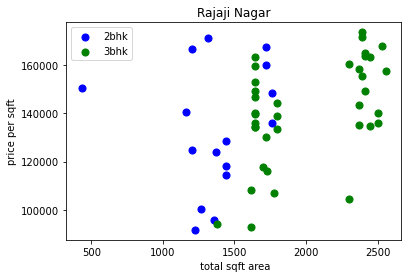

In [53]:
def scatter_plot(df,location):
    BHK2=df[(df.location==location)&(df.BHK==2)]
    BHK3=df[(df.location==location)&(df.BHK==3)]
    plt.scatter(BHK2.total_sqft,BHK2.price_per_sqft,color='blue',label= '2bhk',s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price_per_sqft,color='green',label= '3bhk',s=50)
    plt.xlabel(" total sqft area")
    plt.ylabel("price per sqft")
    plt.title(location)
    plt.legend()
scatter_plot(df7,"Rajaji Nagar")

In [58]:

encoded_df = pd.get_dummies(df7['location'])
encoded_df

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,south,tc.palya
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df_encoded = pd.concat([df7, encoded_df], axis=1)
df_encoded

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,south,tc.palya
0,Built-up Area,Ready To Move,1st Block BEL Layout,4 Bedroom,1800.0,5.0,1.0,250.0,4,138888.888889,...,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,1st Block HBR Layout,4 BHK,3150.0,4.0,2.0,150.0,4,47619.047619,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block HBR Layout,1 BHK,600.0,1.0,0.0,45.0,1,75000.000000,...,0,0,0,0,0,0,0,0,0,0
3,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,2.0,125.0,3,208333.333333,...,0,0,0,0,0,0,0,0,0,0
4,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,1.0,90.0,3,150000.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,Super built-up Area,Ready To Move,frazertown,3 BHK,2900.0,3.0,2.0,325.0,3,112068.965517,...,0,0,0,0,0,0,0,1,0,0
9067,Plot Area,Ready To Move,south,3 Bedroom,2400.0,2.0,0.0,480.0,3,200000.000000,...,0,0,0,0,0,0,0,0,1,0
9068,Plot Area,18-Apr,tc.palya,2 Bedroom,1000.0,2.0,1.0,55.0,2,55000.000000,...,0,0,0,0,0,0,0,0,0,1
9069,Plot Area,Ready To Move,tc.palya,2 Bedroom,880.0,2.0,1.0,48.0,2,54545.454545,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df11=pd.concat([df7,df_encoded],axis='columns')
df11

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,south,tc.palya
0,Built-up Area,Ready To Move,1st Block BEL Layout,4 Bedroom,1800.0,5.0,1.0,250.0,4,138888.888889,...,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,1st Block HBR Layout,4 BHK,3150.0,4.0,2.0,150.0,4,47619.047619,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block HBR Layout,1 BHK,600.0,1.0,0.0,45.0,1,75000.000000,...,0,0,0,0,0,0,0,0,0,0
3,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,2.0,125.0,3,208333.333333,...,0,0,0,0,0,0,0,0,0,0
4,Plot Area,Ready To Move,1st Block HRBR Layout,3 Bedroom,600.0,3.0,1.0,90.0,3,150000.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,Super built-up Area,Ready To Move,frazertown,3 BHK,2900.0,3.0,2.0,325.0,3,112068.965517,...,0,0,0,0,0,0,0,1,0,0
9067,Plot Area,Ready To Move,south,3 Bedroom,2400.0,2.0,0.0,480.0,3,200000.000000,...,0,0,0,0,0,0,0,0,1,0
9068,Plot Area,18-Apr,tc.palya,2 Bedroom,1000.0,2.0,1.0,55.0,2,55000.000000,...,0,0,0,0,0,0,0,0,0,1
9069,Plot Area,Ready To Move,tc.palya,2 Bedroom,880.0,2.0,1.0,48.0,2,54545.454545,...,0,0,0,0,0,0,0,0,0,1


In [63]:
df12=df11.drop(['size','price_per_sqft','area_type','availability','location'],axis='columns')
df12

,total_sqft,bath,balcony,price,BHK,total_sqft,bath,balcony,price,BHK,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,cooketown,frazertown,south,tc.palya
0,1800.0,5.0,1.0,250.0,4,1800.0,5.0,1.0,250.0,4,...,0,0,0,0,0,0,0,0,0,0
1,3150.0,4.0,2.0,150.0,4,3150.0,4.0,2.0,150.0,4,...,0,0,0,0,0,0,0,0,0,0
2,600.0,1.0,0.0,45.0,1,600.0,1.0,0.0,45.0,1,...,0,0,0,0,0,0,0,0,0,0
3,600.0,3.0,2.0,125.0,3,600.0,3.0,2.0,125.0,3,...,0,0,0,0,0,0,0,0,0,0
4,600.0,3.0,1.0,90.0,3,600.0,3.0,1.0,90.0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,2900.0,3.0,2.0,325.0,3,2900.0,3.0,2.0,325.0,3,...,0,0,0,0,0,0,0,1,0,0
9067,2400.0,2.0,0.0,480.0,3,2400.0,2.0,0.0,480.0,3,...,0,0,0,0,0,0,0,0,1,0
9068,1000.0,2.0,1.0,55.0,2,1000.0,2.0,1.0,55.0,2,...,0,0,0,0,0,0,0,0,0,1
9069,880.0,2.0,1.0,48.0,2,880.0,2.0,1.0,48.0,2,...,0,0,0,0,0,0,0,0,0,1


In [64]:
x = df12.drop('price', axis='columns')

# Display the updated DataFrame
print(x)

      total_sqft  bath  balcony  BHK  total_sqft  bath  balcony  BHK  \
0         1800.0   5.0      1.0    4      1800.0   5.0      1.0    4   
1         3150.0   4.0      2.0    4      3150.0   4.0      2.0    4   
2          600.0   1.0      0.0    1       600.0   1.0      0.0    1   
3          600.0   3.0      2.0    3       600.0   3.0      2.0    3   
4          600.0   3.0      1.0    3       600.0   3.0      1.0    3   
...          ...   ...      ...  ...         ...   ...      ...  ...   
9066      2900.0   3.0      2.0    3      2900.0   3.0      2.0    3   
9067      2400.0   2.0      0.0    3      2400.0   2.0      0.0    3   
9068      1000.0   2.0      1.0    2      1000.0   2.0      1.0    2   
9069       880.0   2.0      1.0    2       880.0   2.0      1.0    2   
9070      1400.0   2.0      1.0    3      1400.0   2.0      1.0    3   

      1st Block BEL Layout  1st Block HBR Layout  ...  Yelahanka  \
0                        1                     0  ...          0   

In [65]:
y=df12.price
y.head(10)

,price,price
0,250.0,250.0
1,150.0,150.0
2,45.0,45.0
3,125.0,125.0
4,90.0,90.0
5,125.0,125.0
6,235.0,235.0
7,355.0,355.0
8,428.0,428.0
9,194.0,194.0


In [66]:
x.dtypes

total_sqft                        float64
bath                              float64
balcony                           float64
BHK                                 int64
total_sqft                        float64
                                   ...   
Yeshwanthpur Industrial Suburb      uint8
cooketown                           uint8
frazertown                          uint8
south                               uint8
tc.palya                            uint8
Length: 785, dtype: object

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8050986915356788

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.009, random_state=10)

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Evaluate the model using R-squared score
score = r2_score(y_test, y_pred)
print(f"R-squared Score: {score}")


R-squared Score: 0.7944860789441468


In [70]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', 'total_sqft', 'bath', 'balcony',
       'BHK', '1st Block BEL Layout', '1st Block HBR Layout',
       ...
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yemlur',
       'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb', 'cooketown',
       'frazertown', 'south', 'tc.palya'],
      dtype='object', length=785)

In [71]:
x.shape

(9071, 785)

In [72]:
def BUDGET(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [73]:
BUDGET('1st Block HRBR Layout','100','2','2')

C:\Users\Gurkirat Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-4.26185823e+13, -4.26185823e+13])

In [74]:
import pickle

In [85]:

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)
    

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))